### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('Online Retail.xlsx')

Check dataset details

In [6]:
df.shape

(541909, 8)

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(406829, 8)

In [11]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [12]:
len(df.CustomerID.unique())

4372

Geograhic information

In [13]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [14]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

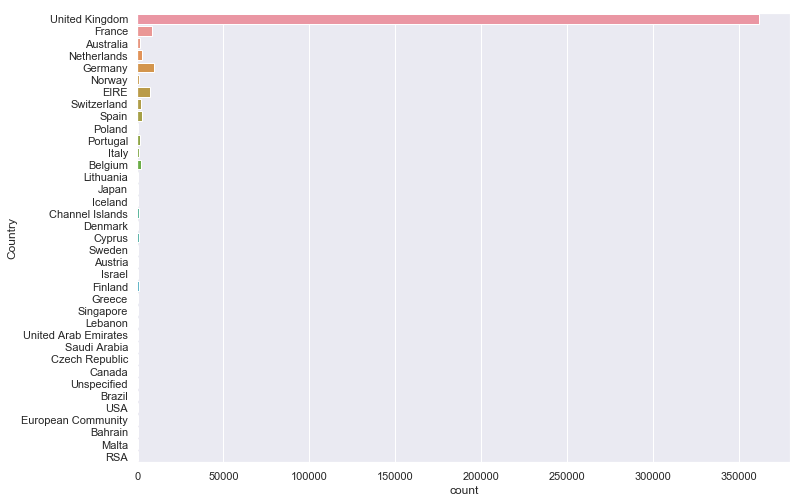

In [15]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [16]:
df = df[df.Country.isin(['United Kingdom'])]

In [17]:
df.shape

(361878, 8)

In [18]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [19]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [20]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [21]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [22]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [23]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [24]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [25]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [26]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [27]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [28]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [29]:
recency_df.shape

(3921, 2)

In [30]:
recency_df.head(2)

,CustomerID,Recency
0,12346.0,325
1,12747.0,2


In [31]:
cust_df = cust_df.merge(recency_df)

In [32]:
cust_df.shape

(3921, 2)

In [33]:
cust_df.head(2)

,CustomerID,Recency
0,17850.0,372
1,13047.0,31


### Frequency of Invoices

In [34]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [35]:
frequency_df.shape

(3921, 2)

In [36]:
frequency_df.head(2)

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103


In [37]:
cust_df = cust_df.merge(frequency_df)

In [38]:
cust_df.shape

(3921, 3)

In [40]:
cust_df.head(2)

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [41]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [42]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [43]:
monetary_df.head(2)

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01


In [44]:
cust_df = cust_df.merge(monetary_df)

In [45]:
cust_df.head(2)

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54


Let's plot the data

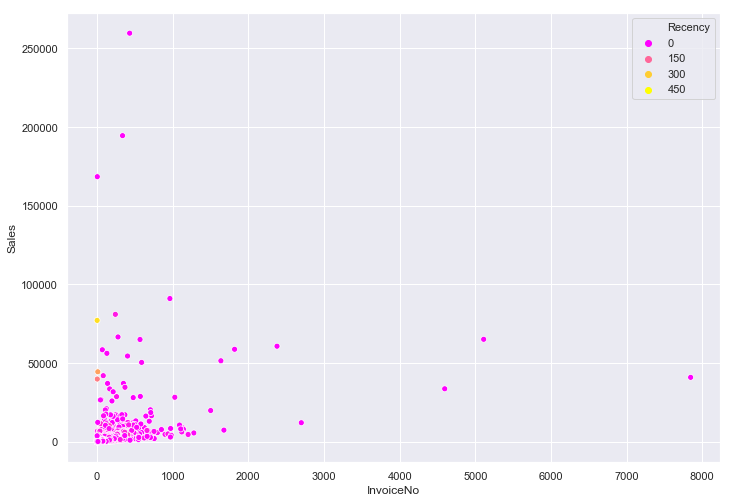

In [46]:
sns.scatterplot(x='InvoiceNo', y='Sales', hue='Recency', data=cust_df, palette='spring')

### Standardize the data

In [47]:
import numpy as np

In [48]:
cust_df['Recency_log'] = np.log(cust_df.Recency+0.1)
cust_df['Monetary_log'] = np.log(cust_df.Sales + 0.1)
cust_df['Frequency_log'] = np.log(cust_df.InvoiceNo)

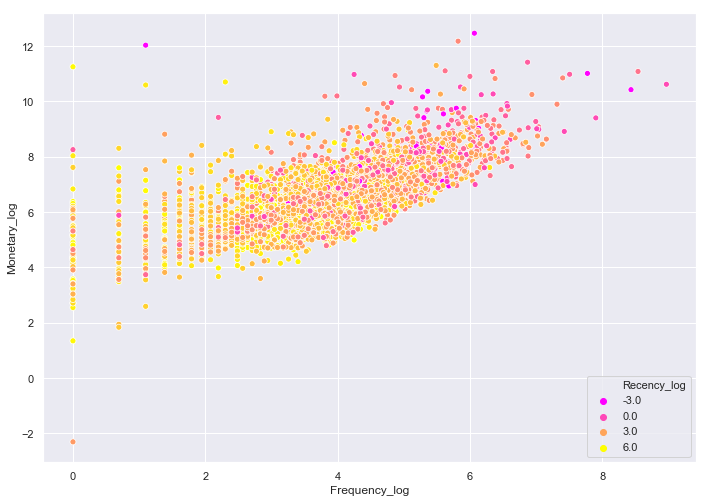

In [49]:
sns.scatterplot(x='Frequency_log', y='Monetary_log', hue='Recency_log', data=cust_df, palette='spring')

### Applying K-Means

In [50]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters=2)

In [53]:
km.fit(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Add cluster information to Dataframe

In [54]:
cust_df['k_2'] = km.predict(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])

### Exploring 2 Clusters

Centroids

In [55]:
km.cluster_centers_

array([[4.58292916, 2.87244973, 5.81429933],
       [2.53976569, 4.75052992, 7.54493636]])

Visualize Clusters

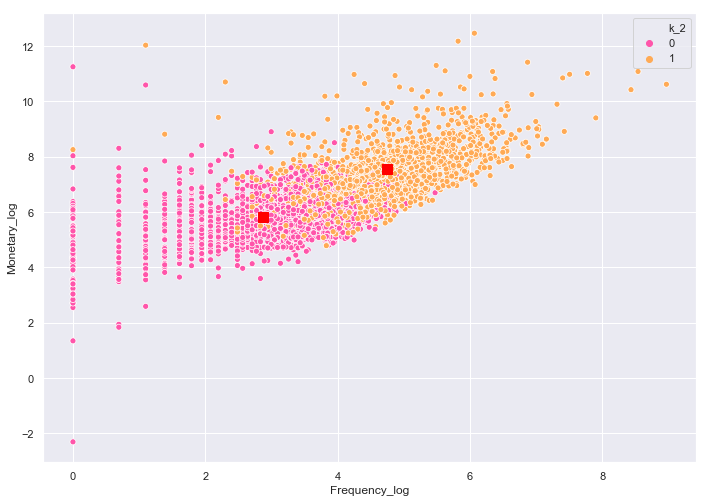

In [68]:
sns.scatterplot(x='Frequency_log', y='Monetary_log', hue='k_2', data=cust_df, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', label='Centroids')

Sum of Squared Error (SSE)

In [69]:
km.inertia_

12012.351878699035

What does 2 Clusters tell us about the dataset

In [70]:
cust_df.groupby('k_2').agg({'Sales':'median', 
                            'InvoiceNo':'median', 
                            'Recency':'median'})

,Sales,InvoiceNo,Recency
k_2,,,
0,336.68,20,108
1,1797.78,113,16


### How many Clusters to use?

In [71]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
    
    #Add cluster information for each record in dataframe
    cust_df['k_' + str(i)] = km.predict(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

Visualize K vs SSE

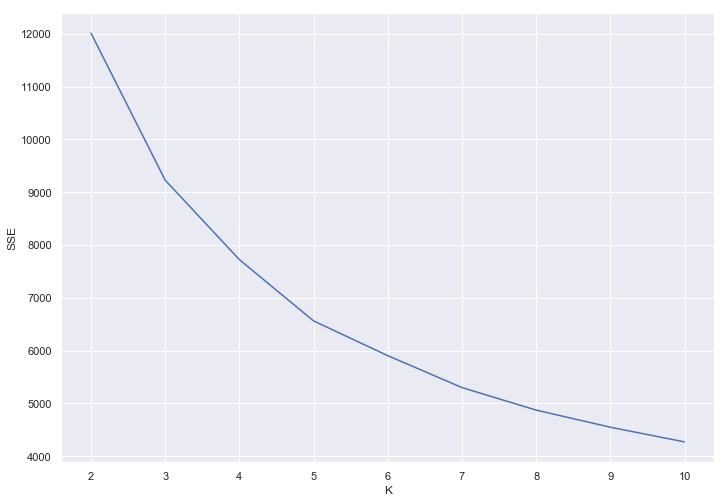

In [74]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Visualize clusters with K=5

        Sales  InvoiceNo  Recency
k_5                              
0     382.470         27     19.0
1    1835.700        116     28.0
2     555.135         34    128.5
3     172.595          8    186.0
4    3264.525        195      3.0


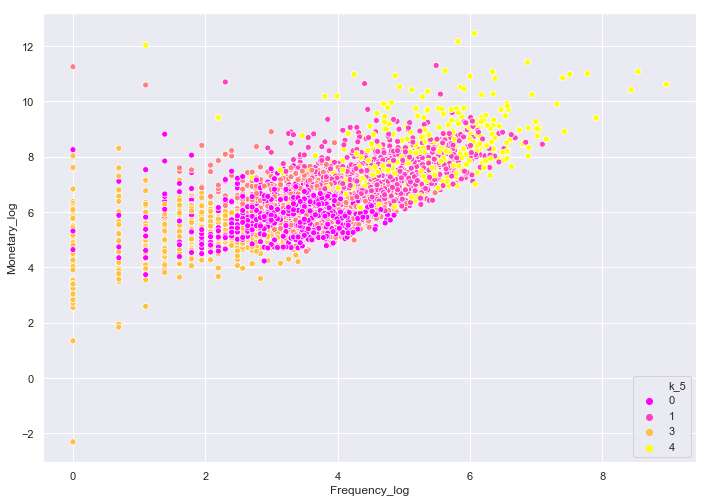

In [75]:
sns.scatterplot(x='Frequency_log', y='Monetary_log', hue='k_5', data=cust_df, palette='spring')
print(cust_df.groupby('k_5').agg({'Sales':'median', 'InvoiceNo':'median', 'Recency':'median'}))